In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cancer_reg.csv',encoding="ISO-8859-1")

In [4]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [27]:
rnm_dict = {'MedianAge':'medianAge',
            'MedianAgeMale': 'median_age_male',
            'MedianAgeFemale': 'median_age_female',
            'Geography': 'geography',
            'AvgHouseholdSize':'avg_household_size',
            'PercentMarried':'pct_married',
            'PctNoHS18_24': 'pct_noHS_18_24',
            'PctHS18_24': 'pct_HS_18_24',
            'PctSomeCol18_24':'pct_somecoll_18_24',
            'PctBachDeg18_24':'pct_bachdeg_18_24',
            'PctHS25_Over': 'pct_HS_25_over',
            'PctBachDeg25_Over':'pct_bachdeg_25_over',
            'PctEmployed16_Over':'pct_emp_16_over',
            'PctUnemployed16_Over': 'pct_unemp_16_over',
            'PctPrivateCoverage':'pct_priv_covrg',
            'PctPrivateCoverageAlone':'pct_priv_covrg_alone',
            'PctWhite': 'pct_white',
            'PctBlack': 'pct_black',
            'PctAsian': 'pct_asian',
            'PctOtherRace':'pct_other',
            'PctMarriedHouseholds':'pct_married_households',
            'BirthRate':'birth_rate'}

df.rename(columns = rnm_dict, inplace=True)            
    

In [28]:
df.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
deathRate                    0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
binnedInc                    0
medianAge                    0
median_age_male              0
median_age_female            0
geography                    0
avg_household_size           0
pct_married                  0
pct_noHS_18_24               0
pct_HS_18_24                 0
pct_somecoll_18_24        2285
pct_bachdeg_18_24            0
pct_HS_25_over               0
pct_bachdeg_25_over          0
pct_emp_16_over            152
pct_unemp_16_over            0
pct_priv_covrg               0
pct_priv_covrg_alone       609
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
pct_white                    0
pct_black                    0
pct_asian                    0
pct_other                    0
pct_marr

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [29]:
df.corr()

,avgAnnCount,avgDeathsPerYear,deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,medianAge,median_age_male,...,pct_priv_covrg_alone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,pct_white,pct_black,pct_asian,pct_other,pct_married_households,birth_rate
avgAnnCount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,...,0.186045,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgDeathsPerYear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,...,0.125820,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,...,-0.363704,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,...,0.109278,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,...,0.788048,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popEst2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,...,0.132660,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,...,-0.761672,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studyPerCap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,...,0.072381,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
medianAge,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,...,-0.024272,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276
median_age_male,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,...,-0.167064,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105


In [13]:
df.rename(columns={'TARGET_deathRate':'deathRate'},inplace=True)

In [14]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

3042    Ellsworth County, Kansas
3043       Finney County, Kansas
3044         Ford County, Kansas
3045     Franklin County, Kansas
3046        Geary County, Kansas
Name: Geography, dtype: object

In [18]:
from statsmodels.formula.api import ols

lr_model = ols(formula='deathRate~avgAnnCount+avgDeathsPerYear+incidenceRate+medIncome+popEst2015+povertyPercent+studyPerCap+binnedInc+MedianAge+MedianAgeMale+MedianAgeFemale\
       +AvgHouseholdSize+PercentMarried+PctNoHS18_24+PctHS18_24\
       +PctSomeCol18_24+PctBachDeg18_24+PctHS25_Over\
       +PctBachDeg25_Over+PctEmployed16_Over+PctUnemployed16_Over\
       +PctPrivateCoverage+PctPrivateCoverageAlone+PctEmpPrivCoverage\
       +PctPublicCoverage+PctPublicCoverageAlone+PctWhite+PctBlack\
       +PctAsian+PctOtherRace+PctMarriedHouseholds+BirthRate', data=df).fit()

In [19]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              deathRate   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     13.47
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           1.74e-58
Time:                        15:36:22   Log-Likelihood:                -2590.1
No. Observations:                 591   AIC:                             5262.
Df Residuals:                     550   BIC:                             5442.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        2457.6152   1508.680      1.629      0.104    -505.864    5421.095
binnedInc[T.(37413.8, 40362.7]]     1.2759      4.050      0.315      0.753      -6.679       9.231
binnedInc[T.(40362.7, 42724.4]]    -1.6679      4.350     -0.383      0.702     -10.213       6.877
binnedInc[T.(42724.4, 45201]]      -4.8382      4.660     -1.038      0.300     -13.991       4.315
binnedInc[T.(45201, 48021.6]]     -10.5463      5.304     -1.988      0.047     -20.964      -0.128
binnedInc[T.(48021.6, 51046.4]]   -16.5643      5.931     -2.793      0.005     -28.214      -4.915
binnedInc[T.(51046.4, 54545.6]]   -10.9318      6.543     -1.671      0.095     -23.784       1.921
binnedInc[T.(54545.6, 61494.5]]   -12.6899      7.671     -1.654      0.099     -27.758       2.378
binnedInc[T.(61494.5, 125635]]    -18.5996     11.610     -1.602      0.110     -41.406       4.207
binnedInc[T.[22640, 34218.1]]       3.9049      4.470      0.874      0.383      -4.875      12.685
avgAnnCount                        -0.0019      0.002     -1.085      0.278      -0.005       0.002
avgDeathsPerYear                    0.0076      0.009      0.833      0.405      -0.010       0.026
incidenceRate                       0.1645      0.017      9.637      0.000       0.131       0.198
medIncome                           0.0006      0.000      1.799      0.073   -5.75e-05       0.001
popEst2015                      -2.588e-06   1.16e-05     -0.223      0.823   -2.54e-05    2.02e-05
povertyPercent                     -0.3871      0.453     -0.854      0.393      -1.277       0.503
studyPerCap                        -0.0002      0.002     -0.081      0.935      -0.005       0.005
MedianAge                          -0.0201      0.018     -1.131      0.259      -0.055       0.015
MedianAgeMale                      -1.1648      0.489     -2.384      0.017      -2.124      -0.205
MedianAgeFemale                     0.5711      0.520      1.097      0.273      -0.451       1.593
AvgHouseholdSize                    1.0665      2.222      0.480      0.631      -3.297       5.430
PercentMarried                      1.9446      0.413      4.713      0.000       1.134       2.755
PctNoHS18_24                      -23.2384     15.070     -1.542      0.124     -52.841       6.364
PctHS18_24                        -22.8830     15.075     -1.518      0.130     -52.495       6.728
PctSomeCol18_24                   -22.9491     15.076     -1.522      0.129     -52.563       6.665
PctBachDeg18_24                   -23.8482     15.083     -1.581      0.114     -53.475       5.779
PctHS25_Over                        0.4733      0.249      1.903      0.058      -0.015       0.962
PctBachDeg25_Over                  -1.1175      0.394     -2.839      0.005      -1

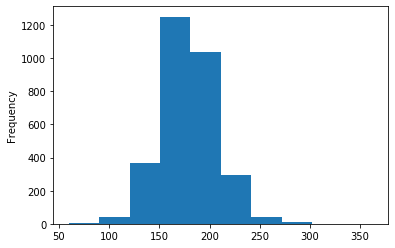

In [24]:
df.deathRate.plot(kind='hist')

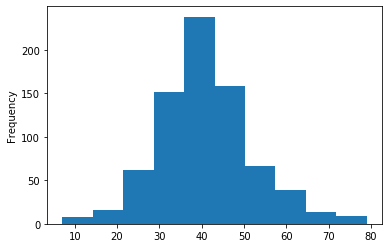

In [23]:
df.PctSomeCol18_24.plot(kind='hist')

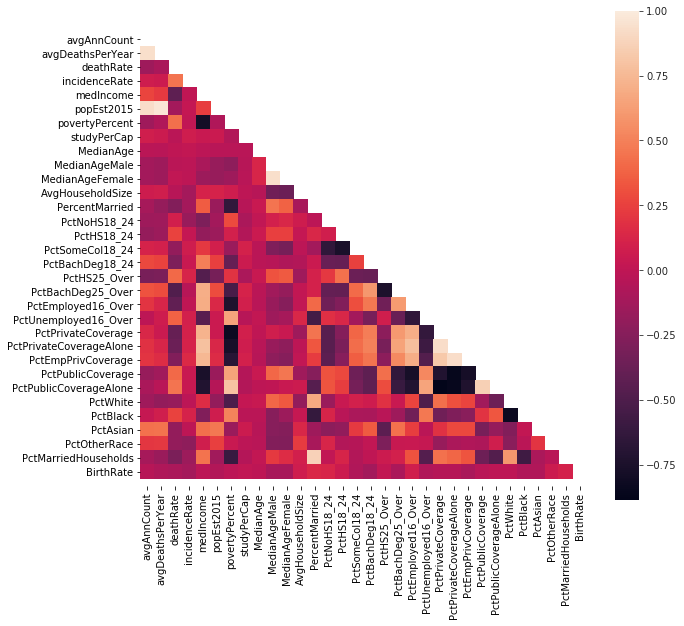

In [25]:
# Set up  matplotlib figure (might have to play around with the 
# figsize if your labels aren't so legible and you don't want
# to mess with the labels using matplotlib)
f, ax = plt.subplots(figsize=(10, 9))

# Create an upper triangular matrix to use to get rid of duplicate/
# useless values
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr(), mask=mask, square=True)
    
# fix for mpl bug that cuts off top/bottom of seaborn viz
# credit: https://github.com/mwaskom/seaborn/issues/1773 SalMac86's post
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!